# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Jubayer Ahmed

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [62]:
# TODO: Import dataset and inspect the first five columns
import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
print('\n', data.head(), '\n\nChecking for null:\n', data.isnull().sum(), '\n\nChecking types:\n', data.dtypes)



        0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1 

Checking for null:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64 

Checking types:
 0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7      int64
dtype: object


Next, you will need to separate the data into your feature matrix and target vector.

In [63]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

data.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Class']
X = data.drop('Class', axis = 1)
y = data['Class']

print("Feature matrix shape: ", X.shape, "\nTarget vector shape: ", y.shape)


Feature matrix shape:  (210, 7) 
Target vector shape:  (210,)


### Step 2: Preprocessing (2 marks)

In [64]:
print('Checking range of each column:\n', data.describe().loc[['min', 'max']])

Checking range of each column:
      Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
min     10.59     12.41    0.8081     4.899     2.630    0.7651     4.519   
max     21.18     17.25    0.9183     6.675     4.033    8.4560     6.550   

     Class  
min    1.0  
max    3.0  


In [65]:
import pandas as pd
from scipy import stats

# Using chatGPT code to check for outliers

# Method 1: Z-Score
z_scores = stats.zscore(data)
threshold = 3
outliers_z = data[(z_scores > threshold).any(axis=1)]

print("Outliers using Z-Score method:")
print(outliers_z)


Outliers using Z-Score method:
     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
203      12.7     13.41    0.8874     5.183     3.091     8.456     5.000   
207      13.2     13.66    0.8883     5.236     3.232     8.315     5.056   

     Class  
203      3  
207      3  


To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*
Since there is not a big difference in the range in each column, I will not use MinMax scaler. Also I checked that there is not too many outliers so we do not need RobustScaler either. Since there is some variation in the ranges causing different means for each feature, I will use standard scaler. This is also suitable since data seems to be follow somewhat of a standard distribution with most data falling in the middle.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [66]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [67]:
# TODO: Print the shape of the training feature matrix and target vector

print("Training feature matrix shape: ", X_train.shape, "\nTraining target vector shape: ", y_train.shape)

Training feature matrix shape:  (157, 7) 
Training target vector shape:  (157,)


Now that we have our training data, we can implement our selected scaler.

In [68]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [69]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 5000, random_state=0)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, random_state=0)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [70]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid = GridSearchCV(model, param_grid, cv=5, return_train_score=True)
grid.fit(X_train_scaled, y_train)

print("Best parameters:\n{}\n".format(grid.best_params_))
print("Best Training Accuracy Score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best Validation Accuracy Score: {:.2f}".format(grid.best_score_))


Best parameters:
{'C': 10.0, 'fit_intercept': True}

Best Training Accuracy Score: 0.97
Best Validation Accuracy Score: 0.94


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [72]:
# TODO: Predict y labels using best estimator

model = LogisticRegression(max_iter = 5000, C = 10, fit_intercept = True, random_state=0)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: {:.2f}".format(test_score))

Test Accuracy Score: 0.96


In [73]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_test_scaled)
X_test_2D = pca.transform(X_test_scaled)

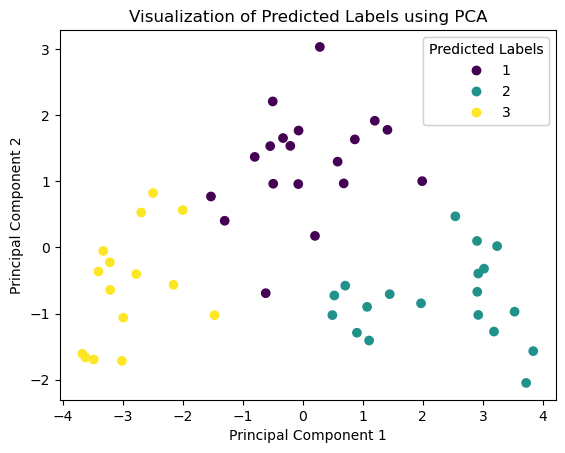

In [74]:
# TODO: Plot test points coloured by predicted labels
# Plot the transformed data 
scatter = plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c = y_pred, cmap = 'viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Predicted Labels using PCA')
legend1 = plt.legend(*scatter.legend_elements(), title='Predicted Labels')
plt.gca().add_artist(legend1)  # Add legend to the current Axes

plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*
1. Yes, the logistic regression worked well as it got a test score of 0.96 which is between the training score of 0.97 and validation score of 0.94. This low bias and low variance shows us that the model learned well from the training set and was able to generalize to the test set.
2. Yes PCA worked well in this case because we can observe in the graph that each label is clustered mostly in its own region of the graph. We know that the labels are mostly correct since we got a test score of 0.96. We can observe that PCA component1 is distinguishing between the labels better since there is more segregation of label in the X axis. This means the data could even be fairly represented with only one PCA component. This indicates that our dataset is likey linear since PCA and logistic regression worked very well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I got my source code fromm the heart-disease-clustering when it came to applying PCA. I got my ploting code from chatGPT. I got my gridsearchCV code from my Assignment4.
2. I completed the questions in the ordered they are presented. 
3. I used chatGPT to plot. I posted my step5 code and asked: "Plot test points coloured by predicted labels".
4. I had some challenge figuring out if I should be fitting the PCA to train or test matrix. Initially I though I have to fit it to train and then predict labels based on transformed train set. However then I realized that we are only using PCA here for visuzalization of the predicted score using the full test set. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [75]:
# TODO: Scale feature matrix
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

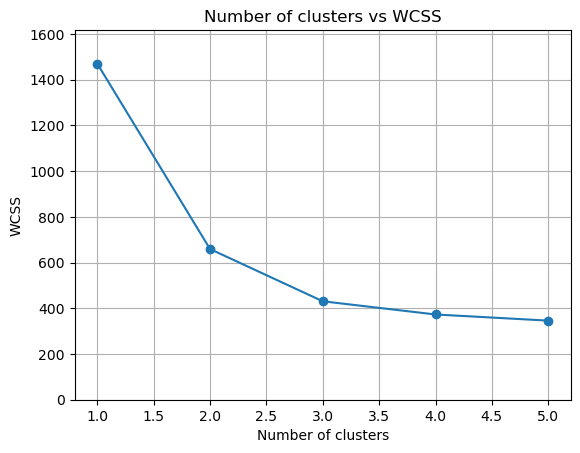

In [76]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
clusters = range(1, 6)
for n in clusters:
    kmeans = KMeans(n_clusters=n, random_state=0, n_init='auto').fit(X_scaled)
    wcss.append(kmeans.inertia_) 

inertia = pd.DataFrame({'clusters': clusters, 'wcss': wcss})

ax = inertia.plot(x='clusters', y='wcss', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Number of clusters vs WCSS')
plt.ylim((0, 1.1 * inertia.wcss.max()))  
plt.grid(True)
ax.legend().set_visible(False)
plt.show()


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [77]:
# TODO: Implement K-means with the number of clusters determined in the previous step
k_means = KMeans(n_clusters = 3, random_state = 0, n_init= 'auto').fit(X_scaled)

In [78]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

sil = silhouette_score(X_scaled, k_means.labels_)
cal = calinski_harabasz_score(X_scaled, k_means.labels_)
dav = davies_bouldin_score(X_scaled, k_means.labels_)
print('Silhouette score:', sil)
print('Calinski-Harabasz score:', cal)
print('Davies-Bouldin score:', dav)

Silhouette score: 0.40072705527512986
Calinski-Harabasz score: 249.7841749161647
Davies-Bouldin score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

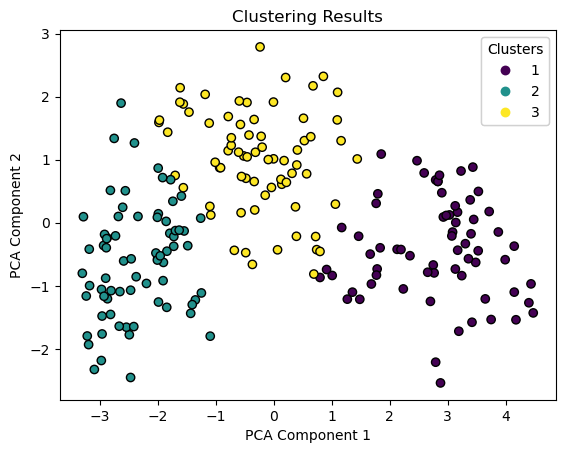

In [79]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_scaled)

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=k_means.labels_, cmap='viridis', edgecolor='black')
plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

legend1 = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend1)  # Add legend to the current Axes

plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [80]:
# TODO: Find the number of principal components using explained variance ratio

pca = PCA().fit(X_scaled)
variance = pca.explained_variance_ratio_.cumsum()
components = 1
for n in variance:
    if (n >= 0.95):
        break
    else:
        components += 1

print('Required number of components:', components)

Required number of components: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [81]:
# TODO: Use PCA to transform the data
pca = PCA(components).fit(X_scaled)
X_transform = pca.transform(X_scaled)

In [82]:
# TODO: Implement K-means with the transformed data
k_means = KMeans(n_clusters = 3, random_state = 0, n_init = 'auto').fit(X_transform)

In [83]:
# TODO: Calculate the three different validation metrics

sil1 = silhouette_score(X_transform, k_means.labels_)
cal1 = calinski_harabasz_score(X_transform, k_means.labels_)
dav1 = davies_bouldin_score(X_transform, k_means.labels_)
print('Silhouette score:', sil1)
print('Calinski-Harabasz score:', cal1)
print('Davies-Bouldin score:', dav1)

Silhouette score: 0.40751448516588734
Calinski-Harabasz score: 259.8713967475589
Davies-Bouldin score: 0.9134498608231102


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [84]:
# TODO: Display results
score_list = [[sil, cal, dav],[sil1, cal1, dav1]]
results = pd.DataFrame(score_list, columns=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"], index=['Score without PCA', 'Score with PCA'])
print(results)

                   Silhouette  Calinski-Harabasz  Davies-Bouldin
Score without PCA    0.400727         249.784175        0.927871
Score with PCA       0.407514         259.871397        0.913450


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. Yes, because we could see from initial data that there were 3 classes so having 3 for the number of cluster makes sense.
2. Yes, we got 3 groupings of samples (clusters) in both plots. The plot in Part 2 has more datapoints since we used more sample points.
3. I used 3 components since it was at the elbow of the inertia vs number of components plot. We also calculated that with 3 components we capture more than 95% of the variance. Using PCA did slightly improve the results. The silhoute score is higher (0.41 vs 0.40) with PCA. This indicates that the decision boundary was fairly close between clusters. The Calinski-Harabasz is also higher with PCA (260 vs 249) while the Davies-Bouldin is slightly lower with PCA (0.91 vs 0.94). This indicates that the culsters with PCA are slightly more separable and well defined. Since PCA reduces the dimension of the data, it can reduce the noise in the data and lead to more clear separation between classes. This would explain why the results with PCA were better.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. After reviewing lab 9 (NFL clustering), I was able to write the source code. 
2. I completed the questions in the order they appear. 
3. I used chatGPT to plot inertia vs number of clusters. I used this prompt: "Use the elbow method to determine the optimal number of clusters using plot". I also used chatGPT to find the number of principal components. I asked: "Find the number of principal components using explained variance ratio". It provided me with a plot and showed me that I should be using "explained_variance_ratio_.cumsum()". I then disregarded the plot it gave me and wrote a for loop to itterate through a range of number of clusters. 
4. No I did not have any significant challenges as I found clustering easier to grasp than PCA. I think the labs, slides and youtube videos from StatQuest greatly helped me understand the concepts. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I liked that the assignment allowed us to apply PCA and understand the place of unsupervised learning. Before PCA and clustering, I was not clear why someone would ever need to do unsupervised learning. This is something I have been wondering about since the semester started so it is nice to wrap up the semester by answering this. Now I understand that sometimes we have more data than we understand and PCA and clustering allow us to make sense of it by simplifyng the data (reducing dimension), reducing noise, etc. It was a bit challenging to understand PCA at first but listening to StatQuest video on Youtube helped greatly. 